# Detection of changes using the Cumulative Sum (CUSUM)

> Marcos Duarte  
> Laboratory of Biomechanics and Motor Control ([http://demotu.org/](http://demotu.org/))  
> Federal University of ABC, Brazil

[Change detection](http://en.wikipedia.org/wiki/Change_detection) refers to procedures to identify abrupt changes in a phenomenon (Basseville and Nikiforov 1993, Gustafsson 2000). By abrupt change it is meant any difference in relation to previous known data faster than expected of some characteristic of the data such as amplitude, mean, variance, frequency, etc.

The [Cumulative sum (CUSUM)](http://en.wikipedia.org/wiki/CUSUM) algorithm is a classical technique for monitoring change detection. One form of implementing the CUSUM algorithm involves the calculation of the cumulative sum of positive and negative changes ($g_t^+$ and $g_t^-$) in the data ($x$) and comparison to a $threshold$. When this threshold is exceeded a change is detected ($t_{talarm}$) and the cumulative sum restarts from zero. To avoid the detection of a change in absence of an actual change or a slow drift, this algorithm also depends on a parameter $drift$ for drift correction. This form of the CUSUM algorithm is given by:

$$ \begin{array}{l l} 
\left\{ \begin{array}{l l} 
s[t] = x[t] - x[t-1] \\
g^+[t] = max\left(g^+[t-1] + s[t]-drift,\; 0\right) \\
g^-[t] = max\left(g^-[t-1] - s[t]-drift,\; 0\right)
\end{array} \right. \\
\\
\; if \;\;\; g^+[t] > threshold \;\;\; or \;\;\;  g^-[t] > threshold: \\
\\
\left\{ \begin{array}{l l} 
t_{talarm}=t \\
g^+[t] = 0 \\
g^-[t] = 0 
\end{array} \right.
\end{array} $$

<!-- TEASER_END -->

There are different implementations of the CUSUM algorithm; for example, the term for the sum of the last elements ($s[t]$ above) can have a longer history (with filtering), it can be normalized by removing the data mean and then divided by the data variance), or this sum term can be squared for detecting both variance and parameter changes, etc.

For the CUSUM algorithm to work properly, it depends on tuning the parameters $h$ and $v$ to what is meant by a change in the data. According to Gustafsson (2000), this tuning can be performed following these steps:

 - Start with a very large $threshold$.  
 - Choose $drift$ to one half of the expected change, or adjust $drift$ such that $g$ = 0 more than 50% of the time.  
 - Then set the $threshold$ so the required number of false alarms (this can be done automatically) or delay for detection is obtained.  
 - If faster detection is sought, try to decrease $drift$.  
 - If fewer false alarms are wanted, try to increase $drift$.   
 - If there is a subset of the change times that does not make sense, try to increase $drift$.  

The function `detect_cusum.py` from Python module `detecta` implements the CUSUM algorithm and a procedure to calculate the ending of the detected change. The function signature is:   

```python
ta, tai, taf, amp = detect_cusum(x, threshold=1, drift=0, ending=False, show=True, ax=None)
```   

Let's see how to use `detect_cusum.py`; first let's import the necessary Python libraries and configure the environment:

## Installation

```bash
pip install detecta
```

Or

```bash
conda install -c duartexyz detecta
```

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


from detecta import detect_cusum

Running the function examples:

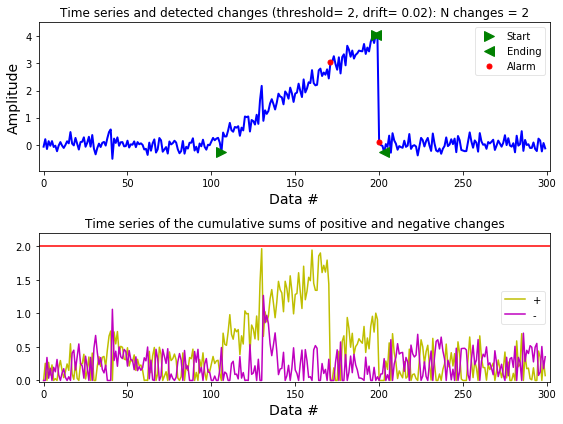

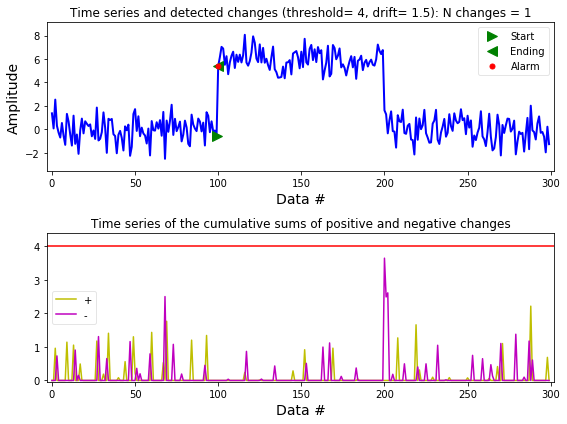

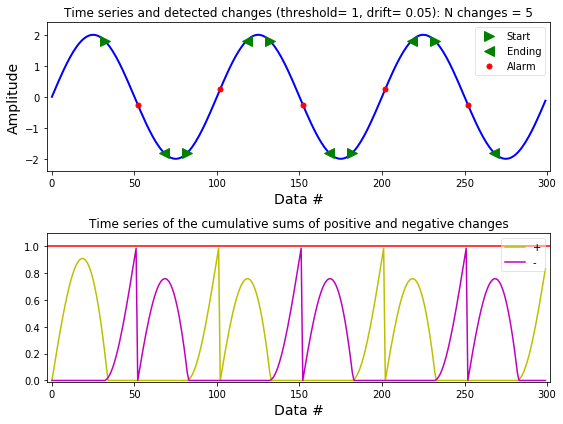

In [2]:
    >>> x = np.random.randn(300)/5
    >>> x[100:200] += np.arange(0, 4, 4/100)
    >>> ta, tai, taf, amp = detect_cusum(x, 2, .02, True, True)

    >>> x = np.random.randn(300)
    >>> x[100:200] += 6
    >>> detect_cusum(x, 4, 1.5, True, True)
    
    >>> x = 2*np.sin(2*np.pi*np.arange(0, 3, .01))
    >>> ta, tai, taf, amp = detect_cusum(x, 1, .05, True, True)

## Function performance

Here is a poor test of the `detect_cusum.py` performance:

In [3]:
x = np.random.randn(10000)
x[400:600] += 6
print('Detection of onset (data size = %d):' %x.size)
%timeit detect_cusum(x, 4, 1.5, True, False)

Detection of onset (data size = 10000):
41 ms ± 639 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


## References

- Michèle Basseville and Igor V. Nikiforov (1993). [Detection of Abrupt Changes: Theory and Application](http://books.google.com.br/books/about/Detection_of_abrupt_changes.html?id=Vu5SAAAAMAAJ). Prentice-Hall.   
- Fredrik Gustafsson (2000) [Adaptive Filtering and Change Detection](http://books.google.com.br/books?id=cyNTAAAAMAAJ). Wiley.